<center><h1>Ye_Jinyi_HW6</h1></center>

Name: Jinyi Ye
<br>
Github Username: angelayejinyi
<br>
USC ID: 1552624974

## 1. Tree-Based Methods

Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### (a) Download the APS Failure data

In [3]:
train_df = pd.read_csv('..data/aps_failure_training_set.csv', skiprows=20, na_values = 'na')
test_df = pd.read_csv('..data/aps_failure_test_set.csv', skiprows=20, na_values = 'na')

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

There are several methods of data imputation, here are some commonly used examples of data imputation techniques:

1. Mean imputation: Simple and quick method of imputation, but it assumes that the data is normally distributed and can lead to biased estimates if the data has outliers.

2. Median imputation: More robust method than mean imputation and is less affected by outliers.

3. Mode imputation: A useful method for imputing categorical variables, but it can lead to biased estimates if the mode is not a representative value.

4. Regression imputation: Can produce more accurate estimates than simple imputation methods, but it assumes that the data is linearly related and can be affected by multicollinearity.

5. K-nearest neighbor imputation: Can produce more accurate estimates than simple imputation methods, but it requires a distance metric and can be affected by the choice of k.

6. Multiple imputation: This involves creating multiple imputed datasets using one of the above methods and then combining the results to obtain a single estimate. This method can produce more accurate estimates than single imputation methods, as it takes into account the uncertainty associated with imputing missing data.

In [4]:
# replace neg class with 0, pos class with 1
train_df['class'] = train_df['class'].replace({'neg':0, 'pos':1})
test_df['class'] = test_df['class'].replace({'neg':0, 'pos':1})

# combine the two dataset into one big dataset
all_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# because the volume of the dataset, here we choose the mean imputation
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())
all_df = all_df.fillna(all_df.mean())
all_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0,81852,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,0,18,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,0,79636,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,0,110,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [13]:
cv = all_df.iloc[:,1:].std() / all_df.iloc[:,1:].mean()
print(cv)

aa_000      4.328608
ab_000      2.178273
ac_000      2.167653
ad_000    206.721500
ae_000     22.293670
             ...    
ee_007      4.885098
ee_008      3.335037
ee_009      5.753933
ef_000     47.919544
eg_000     45.650950
Length: 170, dtype: float64


#### (iii) Plot a correlation matrix

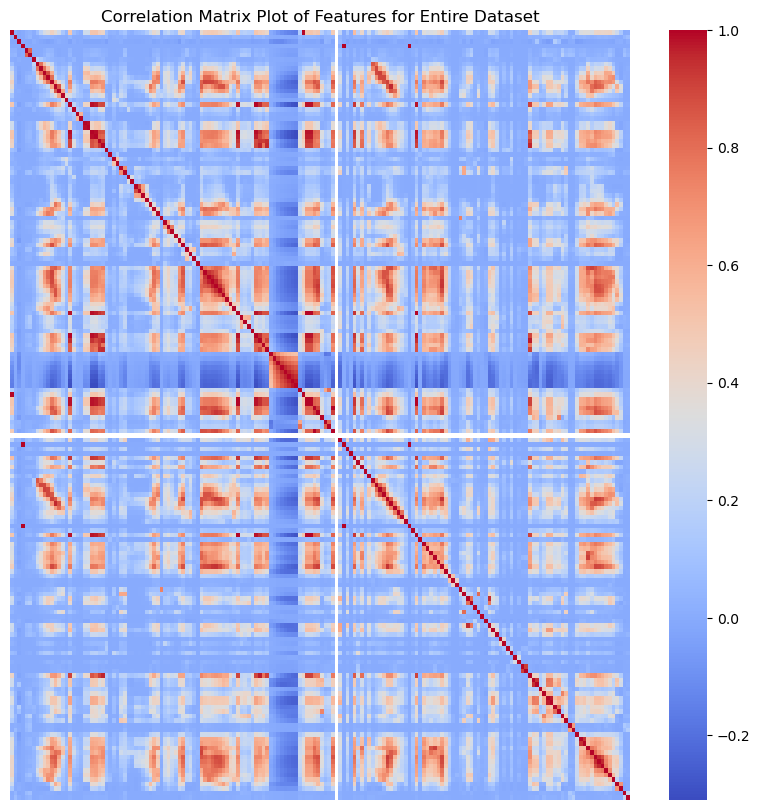

In [29]:
corr_matrix = all_df.iloc[:,1:].corr()
fit, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm',
            xticklabels=False, yticklabels=False, ax=axes)
plt.title("Correlation Matrix Plot of Features for Entire Dataset")
plt.show()

#### (iv) Make scatter plots and box plots

The selected features are: ['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000', 'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009']


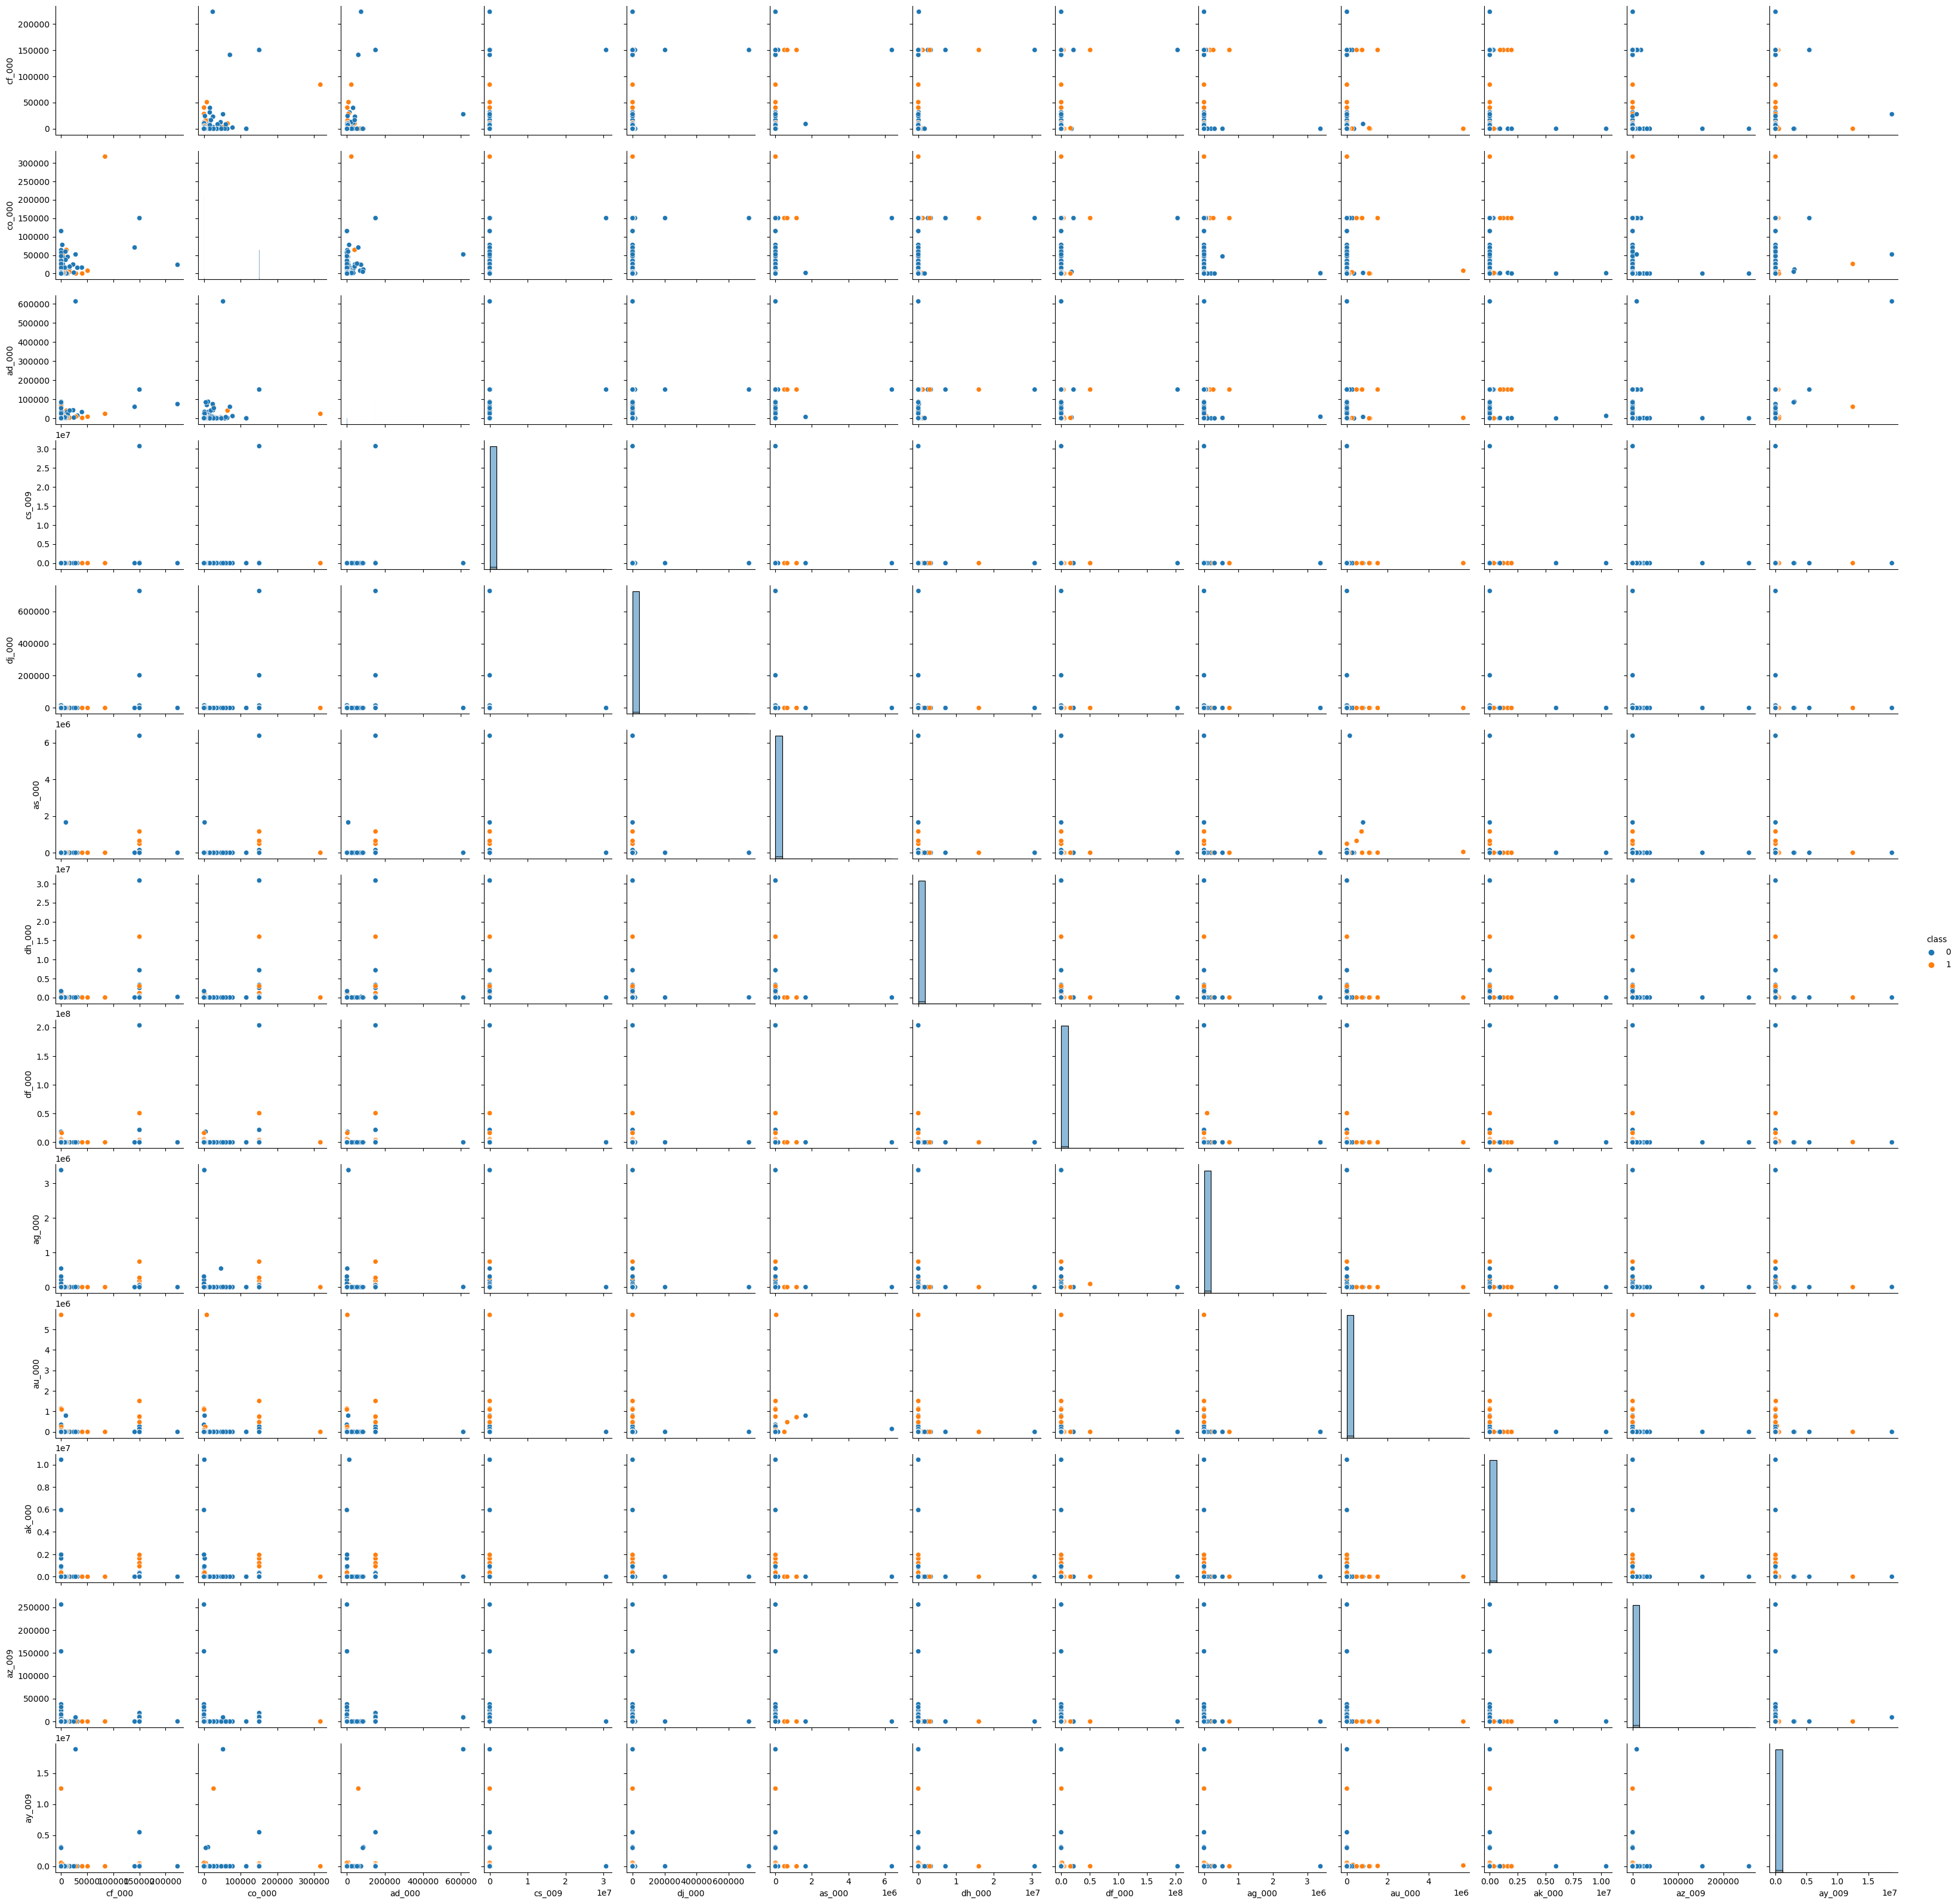

In [40]:
# get the selected top features with highest CV
import math
num = math.floor(math.sqrt(170))
sorted_dict = {k: v for k, v in sorted(dict(cv).items(), key=lambda item: item[1], reverse=True)}

top_keys = []
for i, (key, value) in enumerate(sorted_dict.items()):
    if i >= num:
        break
    top_keys.append(key)
print('The selected features are:', top_keys)

# get the dataframe of selected columns for plotting
selected_features = all_df.loc[:, top_keys]
selected_features.loc[:, 'class'] = all_df['class']

# pairplot
# because the whole dataset is too large, we only sample 50% datapoints
sns.pairplot(selected_features.sample(frac=0.5), hue='class', diag_kind='hist') 
plt.show()

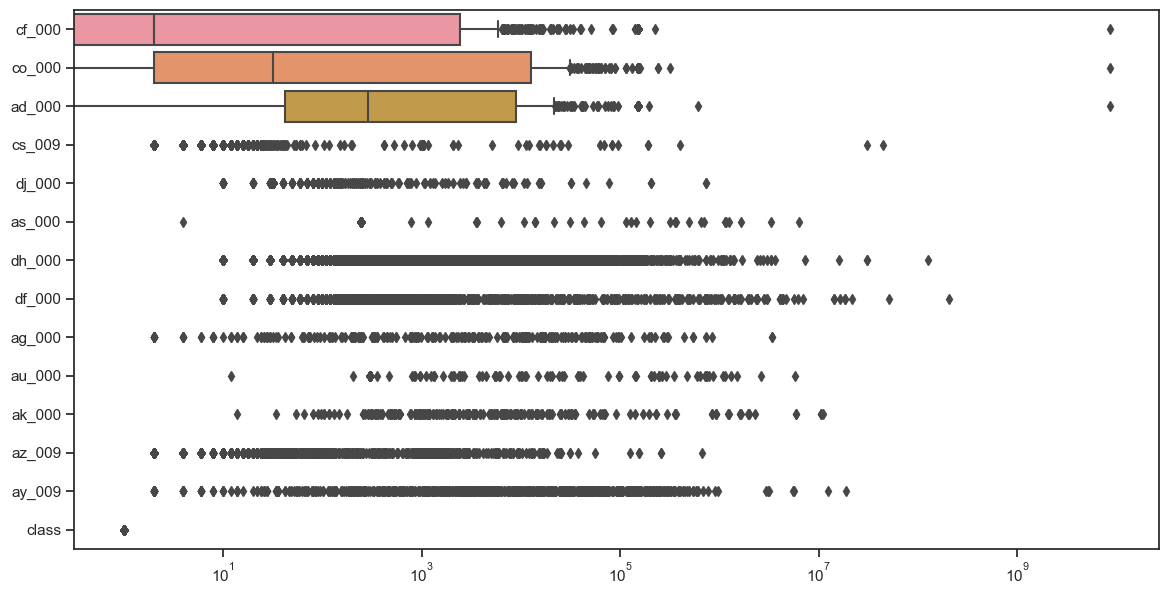

In [48]:
# boxplot
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
boxplot = sns.boxplot(data=selected_features, orient='h', ax=ax)
boxplot.set(xscale="log")
plt.show()

Drawing conclusions about the significance of features just by looking at scatter plots in this case can be challenging, although there are SOME visually discernable differences between two classes with regard to some features in the scatter plot, they are not separated enough, and do not provide any statistical evidence of significance. 

#### (v) Is this data set imbalanced?

In [49]:
# count the number of negative(0) and positive(1) class data points
counts = all_df['class'].value_counts()
print(counts)

0    74625
1     1375
Name: class, dtype: int64


Here, the ratio between the number of samples in the majority class and the minority class is greater than 10:1, so the dataset is considered to be highly imbalanced.

### (c) Train a random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve

# split train and test set
X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

# random forest classifier with default hyperparameters
rfc = RandomForestClassifier(oob_score=True)
rfc.fit(X_train, y_train)

In [35]:
def rfc_performance(model):
    # make predictions on the training set and calculate accuracy
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # make predictions on the testing set and calculate accuracy
    y_test_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # calculate confusion matrix for training and testing set
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # calculate false positive rate (FPR) and true positive rate (TPR) for ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # calculate area under the curve (AUC) for ROC curve
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # calculate misclassification rate for training and testing sets
    misclassification_train = 1 - accuracy_train
    misclassification_test = 1 - accuracy_test

    # estimate Out-of-Bag (OOB) error
    oob_error = 1 - model.oob_score_
    
    # plot ROC curve for testing set
    plt.plot(fpr_test, tpr_test, label='ROC curve (AUC = %0.2f)' % auc_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # print results
    print('Training set accuracy:', accuracy_train)
    print('Testing set accuracy:', accuracy_test)

    print('Confusion matrix for training set:')
    print(cm_train)

    print('Confusion matrix for testing set:')
    print(cm_test)

    print('AUC for training set:', auc_train)
    print('AUC for testing set:', auc_test)

    print('Misclassification rate for training set:', misclassification_train)
    print('Misclassification rate for testing set:', misclassification_test)

    print('Out-of-Bag (OOB) error:', oob_error)

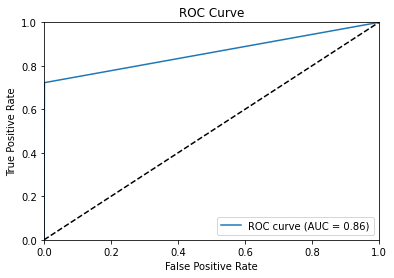

Training set accuracy: 1.0
Testing set accuracy: 0.9924375
Confusion matrix for training set:
[[59000     0]
 [    0  1000]]
Confusion matrix for testing set:
[[15608    17]
 [  104   271]]
AUC for training set: 1.0
AUC for testing set: 0.8607893333333333
Misclassification rate for training set: 0.0
Misclassification rate for testing set: 0.0075625000000000275
Out-of-Bag (OOB) error: 0.0062833333333333075


In [36]:
rfc_performance(rfc)

### (d) Research class imbalance in random forest

Random forests can be effective at addressing class imbalance in several ways:

1. Class weighting: Random forests can be trained with a class_weight parameter that gives more weight to the minority class during training. 

2. Sampling techniques: Undersampling the majority class or oversampling the minority class. Other techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be used to create synthetic samples from the minority class.

3. Feature selection: Select the most important features for predicting the minority class, this can reduce the noise and improve the performance on the minority class.

4. Boosting: Random forests can be combined with boosting algorithms, such as AdaBoost or Gradient Boosting.

Here we try class weighting.

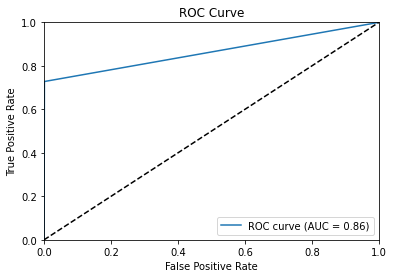

Training set accuracy: 1.0
Testing set accuracy: 0.992625
Confusion matrix for training set:
[[59000     0]
 [    0  1000]]
Confusion matrix for testing set:
[[15609    16]
 [  102   273]]
AUC for training set: 1.0
AUC for testing set: 0.8634879999999999
Misclassification rate for training set: 0.0
Misclassification rate for testing set: 0.00737500000000002
Out-of-Bag (OOB) error: 0.00605


In [37]:
# for imbalanced dataset, we define the class weights
class_weights = {0: 1, 1: 50}
rfc2 = RandomForestClassifier(oob_score=True)
rfc2.fit(X_train, y_train)

rfc_performance(rfc2)

We can hardly observe any difference in performance, the model with class weights performs slightly better.

### (e) XGBoost and Model Trees

In [6]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the XGBoost model with L1-penalized logistic regression at each node
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', alpha=0, n_estimators=100)

# Define the parameter grid for tuning alpha
param_grid = {'reg_alpha': [0.001, 0.01, 0.1, 1, 10]}

In [7]:
def xgb_performance(model):
    # make predictions on the training set and calculate accuracy
    y_train_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # make predictions on the testing set and calculate accuracy
    y_test_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # calculate confusion matrix for training and testing set
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # calculate false positive rate (FPR) and true positive rate (TPR) for ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # calculate area under the curve (AUC) for ROC curve
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # calculate misclassification rate for training and testing sets
    misclassification_train = 1 - accuracy_train
    misclassification_test = 1 - accuracy_test
    
    # plot ROC curve for testing set
    plt.plot(fpr_test, tpr_test, label='ROC curve (AUC = %0.2f)' % auc_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # print results
    print('Training set accuracy:', accuracy_train)
    print('Testing set accuracy:', accuracy_test)

    print('Confusion matrix for training set:')
    print(cm_train)

    print('Confusion matrix for testing set:')
    print(cm_test)

    print('AUC for training set:', auc_train)
    print('AUC for testing set:', auc_test)

    print('Misclassification rate for training set:', misclassification_train)
    print('Misclassification rate for testing set:', misclassification_test)

#### 5-fold Cross Validation

In [40]:
# find the best alpha
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best alpha: {}'.format(grid_search.best_params_['reg_alpha']))
print('Best mean cross-validation score: {:.4f}'.format(grid_search.best_score_))

Best alpha: 0.001
Best mean cross-validation score: 0.9947


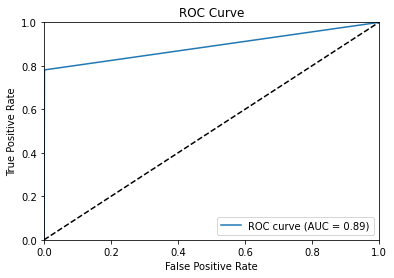

Training set accuracy: 0.9999833333333333
Testing set accuracy: 0.99375
Confusion matrix for training set:
[[59000     0]
 [    1   999]]
Confusion matrix for testing set:
[[15607    18]
 [   82   293]]
AUC for training set: 0.9995
AUC for testing set: 0.8900906666666667
Misclassification rate for training set: 1.666666666666483e-05
Misclassification rate for testing set: 0.006249999999999978


In [42]:
# fit the model with best alpha
xgb_model1 = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss', alpha=0.001, n_estimators=100)
xgb_model1.fit(X_train, y_train)
xgb_performance(xgb_model1)

#### 10-fold Cross Validation

In [43]:
# find the best alpha
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search2 = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)
print('Best alpha: {}'.format(grid_search2.best_params_['reg_alpha']))
print('Best mean cross-validation score: {:.4f}'.format(grid_search2.best_score_))

Best alpha: 1
Best mean cross-validation score: 0.9950


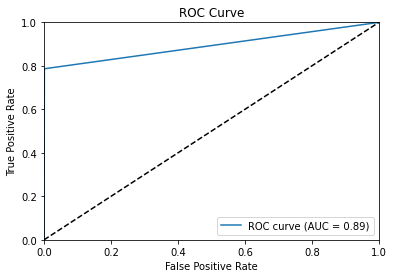

Training set accuracy: 0.9999833333333333
Testing set accuracy: 0.994125
Confusion matrix for training set:
[[59000     0]
 [    1   999]]
Confusion matrix for testing set:
[[15611    14]
 [   80   295]]
AUC for training set: 0.9995
AUC for testing set: 0.8928853333333333
Misclassification rate for training set: 1.666666666666483e-05
Misclassification rate for testing set: 0.005874999999999964


In [43]:
# fit the model with best alpha
xgb_model2 = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss', alpha=1, n_estimators=100)
xgb_model2.fit(X_train, y_train)
xgb_performance(xgb_model2)

### (f) Use SMOTE to pre-process your data

Because we have a large dataset, applying SMOTE inside CV may be a better choice, as it can help to reduce the computational cost and also avoid information leakage between the training and validation sets.

In [55]:
from imblearn.over_sampling import SMOTE

# use 5-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search3 = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy')

# perform cross-validation with SMOTE applied within each fold
for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):
    print(f'Fold {i+1}')
    
    # get the training and testing data for this fold
    X_train_cv, X_test_cv = X_train.loc[list(train_index)], X_train.loc[list(test_index)]
    y_train_cv, y_test_cv = y_train.loc[list(train_index)], y_train.loc[list(test_index)]
    
    # apply SMOTE to balance the training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_cv, y_train_cv)
    grid_search3.fit(X_train_smote, y_train_smote)
    score = grid_search3.score(X_test_cv, y_test_cv)   
    # print the score for each fold
    print('Fold score:', score)

# print the best parameter and score across all folds
print('Best parameter:', grid_search3.best_params_)
print('Best score:', grid_search3.best_score_)

Fold 1
Fold score: 0.9940833333333333
Fold 2
Fold score: 0.99375
Fold 3
Fold score: 0.9939166666666667
Fold 4
Fold score: 0.9933333333333333
Fold 5
Fold score: 0.9929166666666667
Best parameter: {'reg_alpha': 0.001}
Best score: 0.9976377118644066


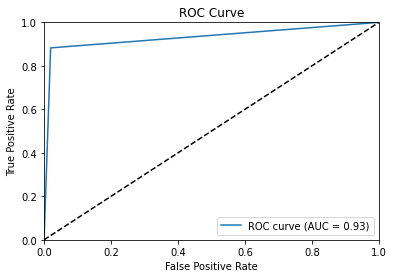

Training set accuracy: 0.9999915254237288
Testing set accuracy: 0.9780625
Confusion matrix for training set:
[[59000     0]
 [    1 58999]]
Confusion matrix for testing set:
[[15318   307]
 [   44   331]]
AUC for training set: 0.9999915254237288
AUC for testing set: 0.9315093333333334
Misclassification rate for training set: 8.47457627117798e-06
Misclassification rate for testing set: 0.021937500000000054


In [11]:
# fit the model with best alpha
X_train, y_train = smote.fit_resample(X_train, y_train)

xgb_model3 = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss', alpha=0.001, n_estimators=100)
xgb_model3.fit(X_train, y_train)
xgb_performance(xgb_model3)

Here, we can observe that the SMOTE performance on test set is not as good as cross validation accuracy. This may be because, the distribution of the minority class in the test data may be different from the distribution in the training data. This can lead to poor generalization, especially if the SMOTE technique is not able to create synthetic examples that are representative of the minority class in the test data. So here we further investigate if the train and test set minority class has the same distribution.

In [15]:
# data preprocessing
train_df = pd.read_csv('/scratch2/jinyiy/data/aps_failure_training_set.csv', skiprows=20, na_values = 'na')
test_df = pd.read_csv('/scratch2/jinyiy/data/aps_failure_test_set.csv', skiprows=20, na_values = 'na')
train_df['class'] = train_df['class'].replace({'neg':0, 'pos':1})
test_df['class'] = test_df['class'].replace({'neg':0, 'pos':1})
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())

# get all positive class data points in train and test
train_df_pos = train_df[train_df['class'] == 1]
test_df_pos = test_df[test_df['class'] == 1]

# select the important features
train_df_selected = train_df_pos.loc[:, top_keys]
test_df_selected = test_df_pos.loc[:, top_keys]

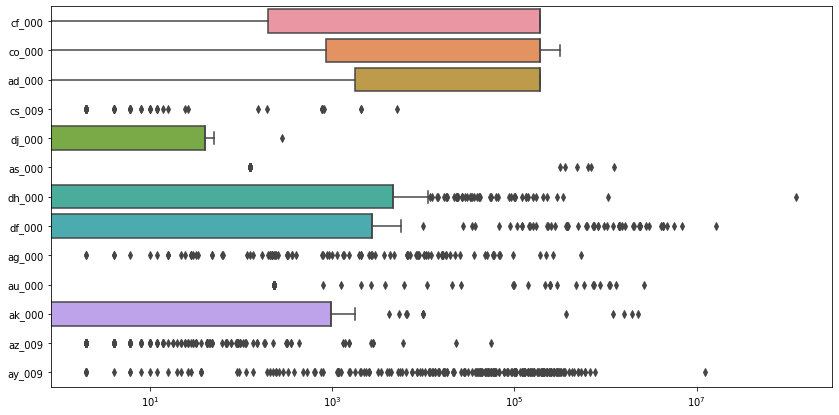

In [17]:
# boxplot for training data
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
boxplot = sns.boxplot(data=train_df_selected, orient='h', ax=ax)
boxplot.set(xscale="log")
plt.show()

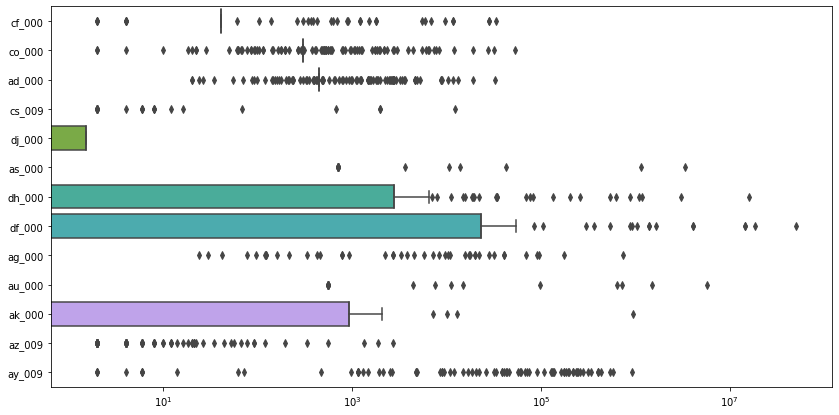

In [18]:
# boxplot for testing data
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
boxplot = sns.boxplot(data=test_df_selected, orient='h', ax=ax)
boxplot.set(xscale="log")
plt.show()

Here we can see that especially for the top 3 features, the train and test data differ a lot in distribution. Therefore, oversampling the minority class in the training set may result in overfitting and poorly represents the test set.

## 2. ISLR 6.6.3

(a) As we increase s from 0, the training RSS will <b>Steadily increase</b>. As s increases, the estimated coefficients will gradually move from 0 to their OLS value. Consequently, the training RSS will decrease steadily.
    
(b) The test RSS will <b>Decrease initially, and then eventually start increasing in a U shape</b>. As the value of s increases, the estimated coefficients will gradually move towards non-zero values. This indicates an increase in the number of predictors and an increase in the model's flexibility. However, this can potentially result in overfitting of the model.

(c) Variance will <b>Steadily increase</b>. At the initial stage, the coefficients are zero, resulting in low variance. As the model becomes more flexible, the variance of the coefficients increases.

(d) (Squared) bias will <b>Steadily decrease</b>. According to the bias-variance trade-off, first the model coeeficients are zero, resulting in high bias, then gradually becomes overfit, which means low bias.

(e) Irreducible error will <b>Remain constant</b>. The irreducible error is model independent.

## 3. ISLR 6.6.5

(a) The Ridge Regression is to optimize:

$$
\min_{\hat{\beta_i}} \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \sum_{j=1}^{p}\hat{\beta_j}x_j)^2 + \lambda \sum_{j=1}^{p}\hat{\beta_j}^2
$$

when the intercept is zero, $n = p = 2$, we have

$$
\min_{\hat{\beta_i}} [(y_1 - \hat{\beta}_1x_{11} - \hat{\beta}_2x_{12})^2 + (y_2 - \hat{\beta}_1x_{21} - \hat{\beta}_2x_{22})^2 + \lambda (\hat{\beta}_1^2 + \hat{\beta}_2^2)]
$$


(b) Since we have $x_{11} = x_{12}$, $x_{21} = x_{22}$ (perfect correlation) here, $\hat{\beta}_1 + \hat{\beta}_2$ is suppose to remain the same. And for Ridge regression, we are minimizing $(\hat{\beta}_1^2 + \hat{\beta}_2^2)$, it is clear that it minimizes when $\hat{\beta}_1 = \hat{\beta}_2$.

(c) For Lasso Regression, we have

$$
\min_{\hat{\beta_i}} (y_1 - \hat{\beta}_1x_{11} - \hat{\beta}_2x_{12})^2 + (y_2 - \hat{\beta}_1x_{21} - \hat{\beta}_2x_{22})^2 + \lambda (| \hat{\beta}_1 | + | \hat{\beta}_2 |)
$$

(d) Since we have $x_{11} = x_{12}$, $x_{21} = x_{22}$ (perfect correlation) here, $\hat{\beta}_1 + \hat{\beta}_2$ is suppose to remain the same. What is different from Ridge is, here we are minimizing $| \hat{\beta}_1 | + | \hat{\beta}_2 |$, which is a constant. There can be an endless pairs of $\hat{\beta}_1$ and $\hat{\beta}_2$.

## 4. ISLR 8.4.5

For the majority polling, as the threshold is 0.5, P over 0.5 has a larger number than P less than 0.5. Thus, the result will be red.

For the average probability method, a mean of 0.45 will lead a prediction of green.

## 5. ISLR 9.7.3

(a) Sketch the observations.

In [20]:
sample_dct = {'X1' : [3, 2, 4, 1, 2, 4, 4], 
           'X2' : [4, 2, 4, 4, 1, 3, 1], 
           'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']}
df = pd.DataFrame.from_dict(sample_dct)
df

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


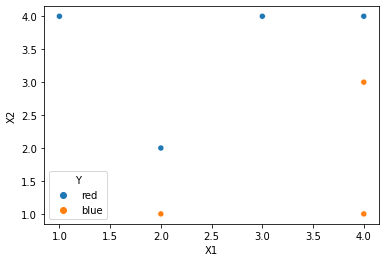

In [22]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Y'])
plt.show()

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane.

/tmp/SLURM_14241463/ipykernel_55648/3016009459.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['X1'], X['X2'], c=y, cmap=plt.cm.Paired)
/home1/jinyiy/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


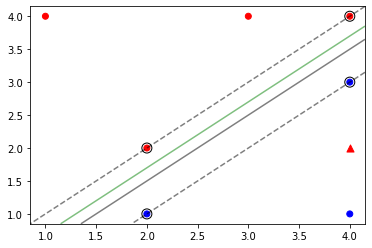

Equation for the hyperplane: y = 1.00x + -0.50


In [41]:
from sklearn import svm

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Fit SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot data points and decision boundary
plt.scatter(X['X1'], X['X2'], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# a hyperplane that is not optimal
ax.contour(XX, YY, Z - 0.4, colors='g', levels=[0], alpha=0.5,
           linestyles=['-'])

# point make the data NOT linear-separable
ax.scatter([4.0], [2.0], color='r', marker='^', s=50)

plt.show()

# Print equation for the hyperplane
print("Equation for the hyperplane: y = {:.2f}x + {:.2f}".format(-clf.coef_[0, 0] / clf.coef_[0, 1], -clf.intercept_[0] / clf.coef_[0, 1]))

(c) Describe the classification rule for the maximal margin classifier:

Classify to red if x1-x2-0.5<0 and classify to blue otherwise.

(d) The dash lines indicates the maximal margin.

(e) The circled ones are support vectors, which are (2,2), (2,1), (4,4), (4,3).

(f) Slight movement of (4,1) will not affect because it does not lie inside the margin or i.e not a support vector.

(g) The green line, which equation is y = x - 0.4.

(h) The additional data point is donated by the red triangle.